## Perlin noise topography

In [2]:
import numpy as np
import xarray as xr
from xrspatial import perlin
import matplotlib.pyplot as plt
nx = 100
ny = 100
data = np.zeros((H, W), dtype=np.float32)
raster = xr.DataArray(data, dims=['y', 'x'])

perlin_noise = perlin(raster,freq=(nx//10,ny//10),seed=1)

NameError: name 'H' is not defined

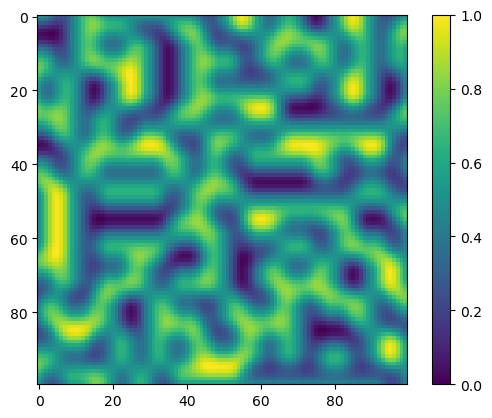

In [5]:
plt.imshow(perlin_noise)
plt.colorbar()

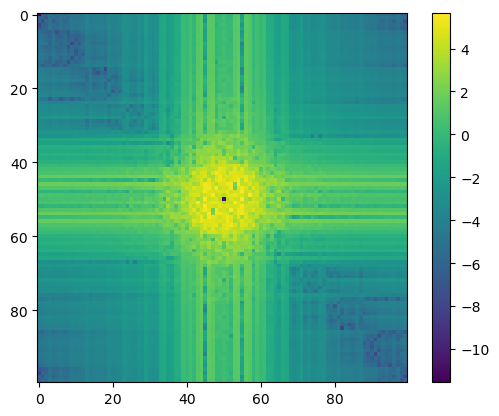

In [15]:

perlin_noise -= np.mean(perlin_noise)
freq = np.abs(calculate_2dft(perlin_noise))
plt.imshow(np.log(freq))
plt.colorbar()

## xrspatial topography

In [50]:
from xrspatial import generate_terrain, bump
# https://xarray-spatial.org/reference/_autosummary/xrspatial.bump.bump.html
# Generate Example Terrain
W = 500
H = 300

template_terrain = xr.DataArray(np.zeros((H, W)))
x_range=(-20e6, 20e6)
y_range=(-20e6, 20e6)

terrain_agg = generate_terrain(
    template_terrain, x_range=x_range, y_range=y_range
)

:Image   [x,y]   (terrain)

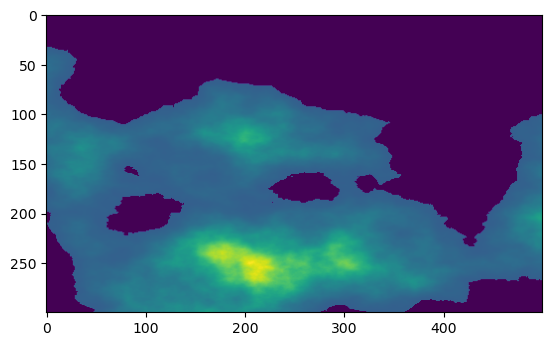

In [53]:
plt.imshow(terrain_agg.data)

## inverse fourier transform terrain generator

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)
def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

nx = 512
ny = 512
dx=100
zmean = 500
max_lamda = 10e3

In [24]:
k = np.fft.fftfreq(nx,1)
m = np.fft.fftfreq(ny,1)
kk,mm = np.meshgrid(k,m)
km = np.sqrt(kk**2+mm**2)
km[0,0] = 1.
del(kk,mm)
spectrum2D = np.sqrt(np.random.uniform(0, 1, (ny,nx))) * np.exp(1.j * np.random.uniform(0, 2 * np.pi, (ny,nx)))
# spectrum2D[km<0.01] = 0.

kc = dx/max_lamda
# spectrum2D *= 1/km**1.
# spectrum2D *= (km-kc)/(1+km/kc)**2
spectrum2D *= 1/(1+(km/kc)**2/1.5)
spectrum2D[km<kc] = 0.
# spectrum2D *= km*np.exp(-km/0.05)

#axs[0].imshow(np.fft.ifftshift(np.abs(spectrum2D)),cmap='Greys')#,vmin=-0.02,vmax=0.02)
zs = np.real(np.fft.ifft2(spectrum2D))

zs = (zs/np.max(np.abs(zs))/2 + 0.5)**1

# zs = (zs/np.max(np.abs(zs))/2 + 0.5)
# zs[zs<0.] = 0.
# zs *= zmean/np.mean(zs)

spectrum2D = np.fft.fft2(zs)
spectrum2D[km<kc] = 0.
zs = np.real(np.fft.ifft2(spectrum2D))
zs -= np.min(zs)
zs *= zmean/np.mean(zs)

slope = 180/np.pi*np.arctan(np.sqrt(((zs[1:,1:]+zs[1:,:-1]-zs[:-1,1:]-zs[:-1,:-1])/2/dx)**2 + ((zs[1:,1:]+zs[:-1,1:]-zs[1:,:-1]-zs[:-1,:-1])/2/dx)**2))

print(np.mean(slope),np.max(slope),np.min(zs),np.mean(zs),np.max(zs))

14.660371861893463 48.16198034044341 0.0 499.9999999999999 962.7817565306136


In [76]:
np.save('MO10_M100m',zs)

In [129]:
np.save('MO10_M200m',zs)

In [78]:
np.save('MO20_M200m',zs)

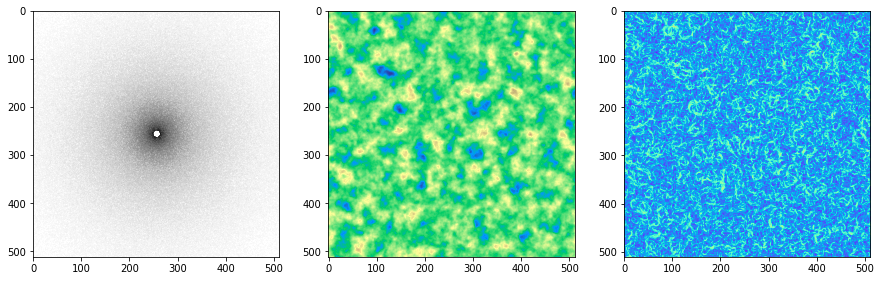

In [26]:
fig,axs = plt.subplots(ncols=3,figsize=(15,5))
axs[0].imshow(np.fft.ifftshift(np.log10(np.abs(np.fft.fft2(zs-zmean)))),cmap='Greys',vmin=3)
axs[1].imshow(zs,cmap='terrain',vmin=0.,vmax=3*zmean)
slope = 180/np.pi*np.arctan(np.sqrt(((zs[1:,1:]+zs[1:,:-1]-zs[:-1,1:]-zs[:-1,:-1])/2/dx)**2 + ((zs[1:,1:]+zs[:-1,1:]-zs[1:,:-1]-zs[:-1,:-1])/2/dx)**2))
axs[2].imshow(slope,cmap='rainbow',vmin=0.,vmax=60)

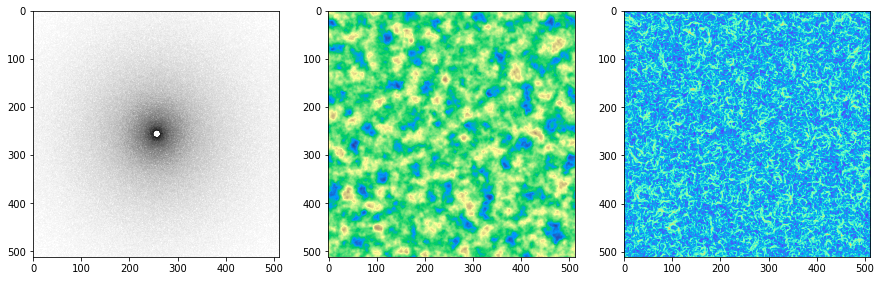

In [75]:
fig,axs = plt.subplots(ncols=3,figsize=(15,5))
axs[0].imshow(np.fft.ifftshift(np.log10(np.abs(np.fft.fft2(zs-zmean)))),cmap='Greys',vmin=3)
axs[1].imshow(zs,cmap='terrain',vmin=0.,vmax=3*zmean)
slope = 180/np.pi*np.arctan(np.sqrt(((zs[1:,1:]+zs[1:,:-1]-zs[:-1,1:]-zs[:-1,:-1])/2/dx)**2 + ((zs[1:,1:]+zs[:-1,1:]-zs[1:,:-1]-zs[:-1,:-1])/2/dx)**2))
axs[2].imshow(slope,cmap='rainbow',vmin=0.,vmax=60)

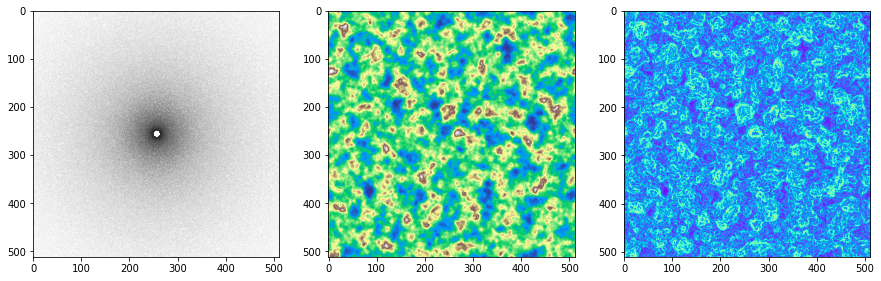

In [79]:
fig,axs = plt.subplots(ncols=3,figsize=(15,5))
axs[0].imshow(np.fft.ifftshift(np.log10(np.abs(np.fft.fft2(zs-zmean)))),cmap='Greys',vmin=3)
axs[1].imshow(zs,cmap='terrain',vmin=0.,vmax=3*zmean)
slope = 180/np.pi*np.arctan(np.sqrt(((zs[1:,1:]+zs[1:,:-1]-zs[:-1,1:]-zs[:-1,:-1])/2/dx)**2 + ((zs[1:,1:]+zs[:-1,1:]-zs[1:,:-1]-zs[:-1,:-1])/2/dx)**2))
axs[2].imshow(slope,cmap='rainbow',vmin=0.,vmax=60)


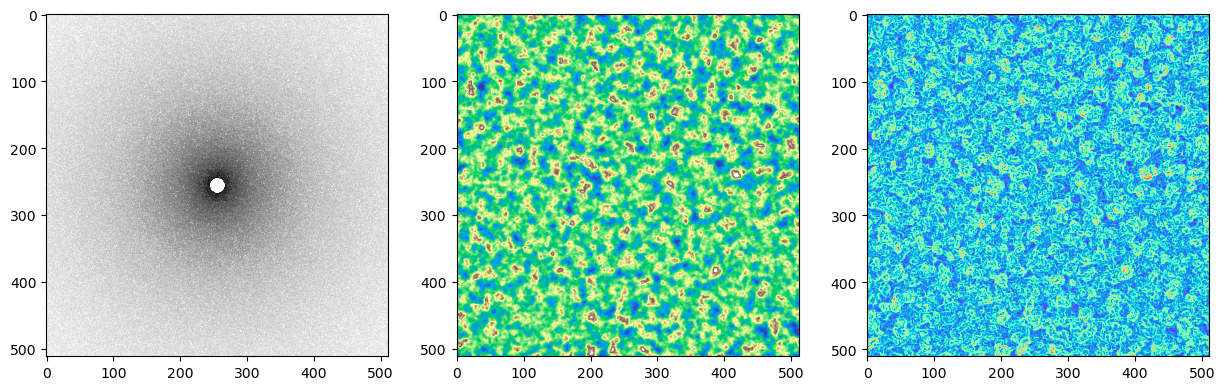

In [133]:
fig,axs = plt.subplots(ncols=3,figsize=(15,5))
axs[0].imshow(np.fft.ifftshift(np.log10(np.abs(np.fft.fft2(zs-zmean)))),cmap='Greys',vmin=3)
axs[1].imshow(zs,cmap='terrain',vmin=0.,vmax=3*zmean)
slope = 180/np.pi*np.arctan(np.sqrt(((zs[1:,1:]+zs[1:,:-1]-zs[:-1,1:]-zs[:-1,:-1])/2/dx)**2 + ((zs[1:,1:]+zs[:-1,1:]-zs[1:,:-1]-zs[:-1,:-1])/2/dx)**2))
axs[2].imshow(slope,cmap='rainbow',vmin=0.,vmax=60)

In [130]:
dx/max_lamda*nx

10.24